In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [20]:
data = pd.read_csv("C:\\Users\\sepeh\\OneDrive\\Desktop\\admission_data.csv")
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='GRE Score'>

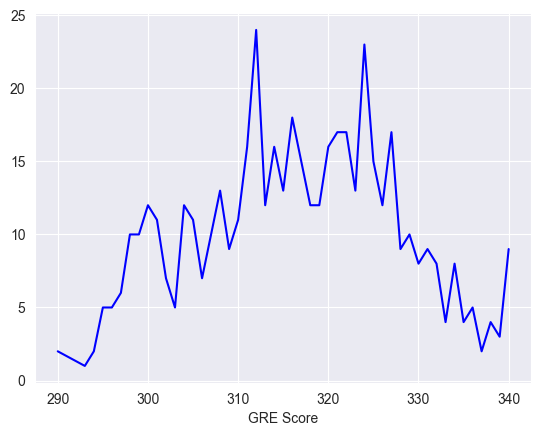

In [21]:
gre_counts = data['GRE Score'].value_counts().sort_index()
# print(gre_counts.index)
# print(gre_counts.values)
sns.lineplot( x=gre_counts.index, y= gre_counts.values, markers= 'o', color='blue', legend=True)


In [22]:
print(data.columns.tolist())

data.drop('LOR ', inplace=True, axis=1)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [23]:
print(data.columns.tolist())

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research', 'Chance of Admit ']


In [24]:
print(len(data))
data.dropna( inplace=True)
print(len(data))

500
500


In [25]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']


In [26]:
# print(X.columns.tolist())
# feature_weights = {
#     "GRE Score": 0.2,
#     "TOEFL Score": 0.15,
#     "University Rating": 0.15,
#     "SOP": 0.125,
#     "CGPA": 0.25,
#     "Research": 0.125
# }
# 


In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
# X_Weighted = X_scaled * np.array([feature_weights[col] for col in X.columns])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


In [30]:
knn_model = KNeighborsRegressor(n_neighbors=6,algorithm='brute')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=6)

In [31]:
y_pred_train = knn_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)

print(f"root mean squared error is(for train data) :\n {rmse_train}")

root mean squared error is(for train data) :
 0.05938527688839307


In [32]:
y_pred = knn_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred)
print(f"root mean squared error is  : \n {rmse_test}")

root mean squared error is  : 
 0.06461832385459855


In [33]:
X.head(32)

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.0,8.87,1
2,316,104,3,3.0,8.00,1
3,322,110,3,3.5,8.67,1
4,314,103,2,2.0,8.21,0
5,330,115,5,4.5,9.34,1
6,321,109,3,3.0,8.20,1
7,308,101,2,3.0,7.90,0
8,302,102,1,2.0,8.00,0
9,323,108,3,3.5,8.60,0


In [34]:
# تبدیل داده به آرایه 2D و قرار دادن آن در یک DataFrame با نام ویژگی‌ها
test_data = pd.DataFrame([[285, 110,123, 4, 7, 0]], columns=X.columns)  # نام ستون‌ها همان X.columns
test_scaled = scaler.transform(test_data)  # مقیاس‌دهی داده
print(test_scaled)

# پیش‌بینی با استفاده از مدل KNN
test_prediction = knn_model.predict(test_scaled)
print(test_prediction)


[[-0.1         0.64285714 30.5         0.75        0.06410256  0.        ]]
[0.74]


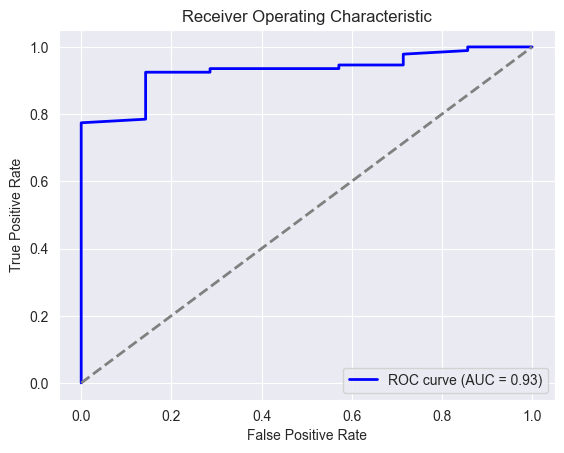

In [35]:
# fpr و tpr را بر اساس y_pred محاسبه کنید
y_test_binary = (y_test > 0.5).astype(int)
fpr, tpr, thresholds = roc_curve( y_test_binary, y_pred)  # y_test را به باینری تبدیل کنید

# محاسبه AUC
roc_auc = auc(fpr, tpr)

# رسم نمودار ROC
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)  # خط مرجع
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()
